<a href="https://colab.research.google.com/github/lfarlima/Project-2/blob/main/Multivariate_Time_Series_Vector_Auto_Regression_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Time series modeling is a powerful technique that acts as a gateway to understanding and forecasting trends and patterns
- A Multivariate times series is more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. 
-In a VAR model, each variable is a linear function of the past values of itself and the past values of all other variables. Unlike Autoregession, VAR is able to understand and use the relationship between several variables. The is use for describing the dynamic behaviour of the data and also provides better forcasting results. 

## Running VAR model for Palantir's Twitter Sentiment Score and Closing Price

In [7]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import required packages
from google.colab import files

#Uploading files for Twitter Settlement and Yahoo Finance 

uploaded = files.upload()
url = '/content/pltr_yf_twitter_df.csv'
df = pd.read_csv(url)
df.head(5)

Saving pltr_yf_twitter_df.csv to pltr_yf_twitter_df (1).csv


,Unnamed: 0,Close,compound,positive,negative,neutral,Polarity Score
0,2020-09-30,9.50,0.147594,0.094543,0.034711,0.870748,0.272287
1,2020-10-01,9.46,0.009902,0.080625,0.063405,0.855963,0.101329
2,2020-10-02,9.20,-0.000485,0.084356,0.061115,0.854532,0.108974
3,2020-10-05,9.03,0.186457,0.091758,0.033205,0.875005,0.394737
4,2020-10-06,9.90,0.197717,0.104604,0.036160,0.859233,0.363144


In [8]:
# The data type of the Date_Time column is object and we need to change it to datetime. Also, for preparing the data, we need the index to have datetime. 

df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df.set_index('Date',inplace=True)

In [9]:
# dropping unnecessary columns for analysis

df= df.drop(columns=['positive', 'negative', 'neutral', 'Polarity Score'])
df.head()

,Close,compound
Date,,
2020-09-30,9.50,0.147594
2020-10-01,9.46,0.009902
2020-10-02,9.20,-0.000485
2020-10-05,9.03,0.186457
2020-10-06,9.90,0.197717


In [10]:
#missing value treatment
cols = df.columns
for j in cols:
    for i in range(0,len(df)):
       if df[j][i] == 9.5:
           df[j][i] = df[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues

coint_johansen(df,-1,1).eig

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([6.28637142e-02, 9.25973146e-05])

In [14]:
#creating the train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [15]:
#import libraries

from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from numpy import asarray as arr

In [16]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse score 
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Close is :  4.234122244969856
rmse value for compound is :  0.026810973355400374


In [ ]:
# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. 

In [17]:
#make final predictions
model = VAR(endog=df)
model_fit = model.fit()
yforecast = model_fit.forecast(model_fit.y, steps=5)
print(yforecast)

[[23.11420342  0.20257672]
 [23.12313835  0.19747171]
 [23.1169492   0.19523417]
 [23.10447453  0.19425643]
 [23.08958528  0.19383206]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


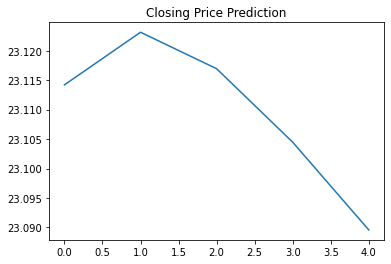

In [23]:
# plot prediction for 5 days

df2 = pd.DataFrame(yforecast)
close=df2[0].plot(title="Closing Price Prediction")


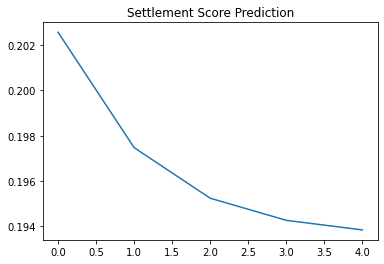

In [22]:
close=df2[1].plot(title="Settlement Score Prediction")

## Running VAR model for Palantir's Newsapi Settlement Score and Closing Price

In [32]:
#Uploading files for Twitter Settlement and Yahoo Finance 

uploaded = files.upload()
url = '/content/pltr_yf_newsapi.csv'
df3 = pd.read_csv(url)
df3.head(5)

Saving pltr_yf_newsapi.csv to pltr_yf_newsapi (3).csv


,Unnamed: 0,Close,compound,positive,negative,neutral,Polarity Score,Compound Returns,Rolling 5 Day Compound
0,2021-03-10,24.750000,0.521900,0.15175,0.000000,0.848250,0.750000,NaN,NaN
1,2021-03-11,26.730000,-0.071825,0.01925,0.042000,0.938750,0.000000,-0.137622,NaN
2,2021-03-12,26.920000,0.000000,0.00000,0.000000,1.000000,0.000000,-0.000000,NaN
3,2021-03-15,26.790001,0.054700,0.06800,0.057667,0.874333,0.333333,NaN,NaN
4,2021-03-16,25.610001,0.513567,0.14500,0.020000,0.835000,1.000000,NaN,0.203668


In [33]:
# The data type of the Date_Time column is object and we need to change it to datetime. Also, for preparing the data, we need the index to have datetime. 

df3['Unnamed: 0'] = pd.to_datetime(df3['Unnamed: 0'])
df3.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df3.set_index('Date',inplace=True)

In [34]:
# dropping unnecessary columns for analysis

df3= df3.drop(columns=['positive', 'negative', 'neutral', 'Polarity Score','Compound Returns','Rolling 5 Day Compound'])
df3.head()

,Close,compound
Date,,
2021-03-10,24.750000,0.521900
2021-03-11,26.730000,-0.071825
2021-03-12,26.920000,0.000000
2021-03-15,26.790001,0.054700
2021-03-16,25.610001,0.513567


In [61]:
#missing value treatment
cols = df.columns
for j in cols:
    for i in range(0,len(df3)):
       if df3[j][i] == 25:
           df3[j][i] = df3[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues

coint_johansen(df3,-1,1).eig

array([0.44121495, 0.06191841])

In [64]:
#creating the train and validation set
train3 = df3[:int(0.7*(len(df3)))]
valid3 = df3[int(0.7*(len(df3))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model3 = VAR(endog=train3)
model_fit3 = model3.fit()

# make prediction on validation
prediction3 = model_fit3.forecast(model_fit3.y, steps=len(valid3))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [67]:
#converting predictions to dataframe
pred3 = pd.DataFrame(index=range(0,len(prediction3)),columns=cols)
for j in range(0,2):
    for i in range(0, len(prediction3)):
       pred3.iloc[i][j] = prediction3[i][j]

#check rmse score 
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred3[i], valid3[i])))

rmse value for Close is :  1.4062375633483188
rmse value for compound is :  0.1872502130834966


In [69]:
# Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. 

In [70]:
#make final predictions
model3 = VAR(endog=df3)
model_fit3 = model3.fit()
yforecast3 = model_fit3.forecast(model_fit3.y, steps=5)
print(yforecast3)

[[23.9403672   0.18233268]
 [23.91074885  0.1909914 ]
 [23.88078428  0.18994064]
 [23.85563477  0.18976244]
 [23.83415608  0.18954941]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


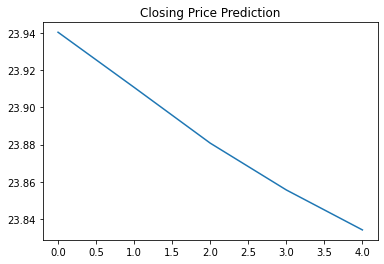

In [72]:
# plot prediction for 5 days

df4 = pd.DataFrame(yforecast3)
close3=df4[0].plot(title="Closing Price Prediction")

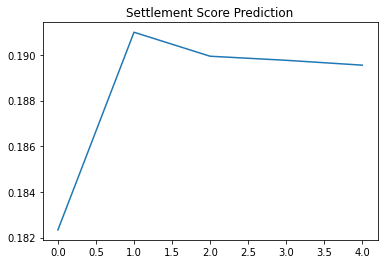

In [73]:
close3=df4[1].plot(title="Sentiment Score Prediction")